feature scaling on neural networks input
we are using social netowrk ads datasets.

In [6]:
import pandas as pd
df = pd.read_csv("/Social_Network_Ads.csv")

In [7]:
df.head(5) #remove unwanted features like user_ID and Gender
df = df.iloc[:,2:]

In [8]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


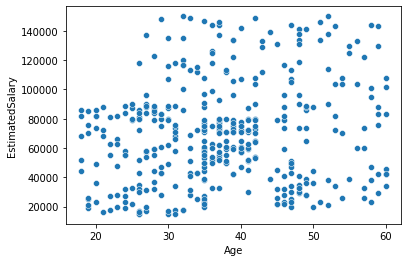

In [9]:
import seaborn as sns
sns.scatterplot(df.iloc[:,0],df.iloc[:,1]) #ploting scatter plot for geting some understanding relation or age and salary

In [13]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]
x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split #you can import function by different ways
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [16]:
#importing requirements library
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [18]:
#creating a sequential mode
model = Sequential()
#adding hidden layers
model.add(Dense(128,activation='relu',input_dim=2) ) #128 neuron of hidden layers
model.add(Dense(1,activation="sigmoid")) #here we are using sigmoid because its bindary classification prob
#note: it is a basic model

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test ), epochs= 100)


Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 182.9314 - accuracy: 0.4781 - val_loss: 50.4938 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 125.7187 - accuracy: 0.4781 - val_loss: 228.4607 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 148.1817 - accuracy: 0.4969 - val_loss: 185.9140 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 155.1816 - accuracy: 0.5406 - val_loss: 49.5027 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 162.9585 - accuracy: 0.5781 - val_loss: 273.6682 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 173.4593 - accuracy: 0.4969 - val_loss: 111.4352 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 89.2675 - accuracy: 0.5156 - val_loss: 43.9584 - val_accur

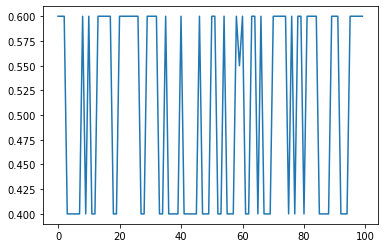

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history["val_accuracy"])
#by overving this graph the accuracy is varry in between only 40% to 60%, 1 to 100 epochs

In [23]:
#the accuracy is ranging in between 40-60% because of the scale of the input feature is more 
#so we have to set the scale of the input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test.scaled = scaler.fit_transform(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


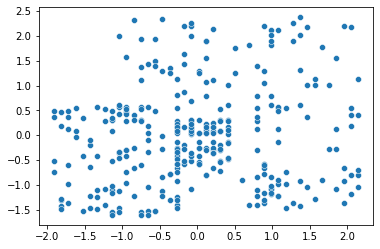

In [25]:
sns.scatterplot(x_train_scaled[:,0],x_train_scaled[:,1])

In [28]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2) ) #128 neuron of hidden layers
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history1 = model.fit(x_train_scaled, y_train, validation_data=(x_test.scaled, y_test ), epochs= 100)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.6917 - accuracy: 0.5594 - val_loss: 0.6553 - val_accuracy: 0.7625
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6308 - accuracy: 0.7969 - val_loss: 0.5971 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5797 - accuracy: 0.8156 - val_loss: 0.5470 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5346 - accuracy: 0.8188 - val_loss: 0.5056 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4957 - accuracy: 0.8219 - val_loss: 0.4711 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4626 - accuracy: 0.8313 - val_loss: 0.4415 - val_accuracy: 0.8125
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4345 - accuracy: 0.8438 - val_loss: 0.4165 - val_accuracy: 0.8250
Epoch 8/100


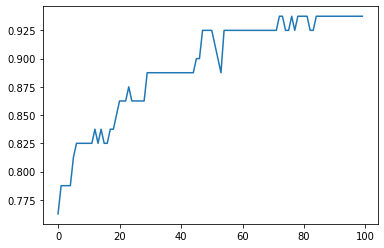

In [30]:
plt.plot(history1.history["val_accuracy"])
#we can se the difference between the unscaled data accuracy and scaled data accuracy


# New Section